In [118]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.3MB 4.1MB/s ta 0:00:01
  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [119]:
!pip install autograd

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sy
import autograd
from autograd import numpy as anp
import time
from autograd import grad
from scipy.stats import norm
from scipy.optimize import root
from scipy.integrate import quad
from scipy import sparse

# Numerical Differentiation

## Problem 1. {-}

In [140]:
def p1_1_1(X):
    """
    f'(x)
    """
    x = sy.symbols("x")
    f = (sy.sin(x)+1)**(sy.sin(sy.cos(x)))
    f_pr = f.diff(x)
    return sy.lambdify(x,f_pr,"numpy")(X)

In [25]:
def p1_1_2(ret=False):
    """
    plot f(x) and f'(x)
    """
    X = np.linspace(-np.pi,np.pi)
    f = lambda x: (np.sin(x)+1)**(np.sin(np.cos(x)))
    
    if ret: return X,f
    
    fig,ax = plt.subplots()
    
    ax.plot(X,f(X),label="$f(x)$")
    ax.plot(X,p1_1_1(X),label="$f^{\prime}(x)$")
    
    ax.legend()
    ax.spines["bottom"].set_position("zero")
    
    plt.show()

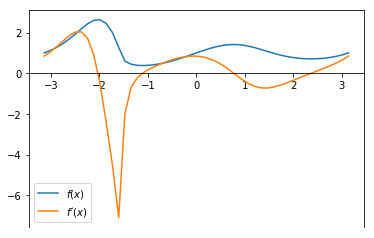

In [26]:
p1_1_2()

## Problem 2. {-}

In [36]:
def p1_2_1(f,x,h):
    return (f(x+h)-f(x))/h

In [37]:
def p1_2_2(f,x,h):
    return (-3*f(x)+4*f(x+h)-f(x+2*h))/(2*h)

In [52]:
def p1_2_3(f,x,h):
    return (f(x)-f(x-h))/h

In [39]:
def p1_2_4(f,x,h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

In [40]:
def p1_2_5(f,x,h):
    return (f(x+h)-f(x-h))/(2*h)

In [41]:
def p1_2_6(f,x,h):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

In [45]:
def p1_2_7():
    
    X,f = p1_1_2(ret=True)
    tol=1e-3
    
    fig,ax = plt.subplots()
    
    ax.plot(X,p1_2_1(f,X,tol),label="Fwd, 1")
    ax.plot(X,p1_2_2(f,X,tol),label="Fwd, 2")
    ax.plot(X,p1_2_3(f,X,tol),label="Bwd, 1")
    ax.plot(X,p1_2_4(f,X,tol),label="Bwd, 2")
    ax.plot(X,p1_2_5(f,X,tol),label="Ctd, 2")
    ax.plot(X,p1_2_6(f,X,tol),label="Ctd, 4")
    
    ax.legend()
    ax.spines["bottom"].set_position("zero")
    
    plt.show()

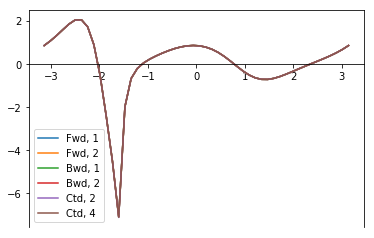

In [46]:
p1_2_7()

## Problem 3. {-}

In [47]:
def p1_3_1(f,x_0,h,q):
    return np.abs(p1_1_1(x_0)-q(f,x_0,h))

In [73]:
def p1_3_3():
    
    X,f = p1_1_2(ret=True)
    
    n=8
    h=np.logspace(-n,0,n+1)
    
    plt.figure()
    
    plt.plot(h,p1_3_1(f,1,h,p1_2_1),"--o",label="Fwd, 1")
    plt.plot(h,p1_3_1(f,1,h,p1_2_2),"--o",label="Fwd, 2")
    plt.plot(h,p1_3_1(f,1,h,p1_2_3),"--o",label="Bwd, 1")
    plt.plot(h,p1_3_1(f,1,h,p1_2_4),"--o",label="Bwd, 2")
    plt.plot(h,p1_3_1(f,1,h,p1_2_5),"--o",label="Ctd, 2")
    plt.plot(h,p1_3_1(f,1,h,p1_2_6),"--o",label="Ctd, 4")
    
    plt.loglog()
    
    plt.legend()
    plt.show()

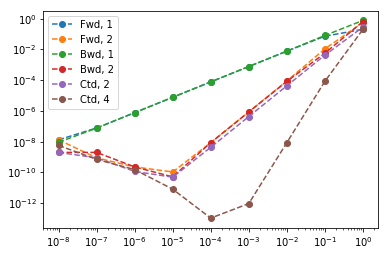

In [74]:
p1_3_3()

## Problem 4. {-}

In [85]:
def p1_4_1():
    
    dat=np.load("plane.npy")
    t,α,β=dat[:,0],dat[:,1],dat[:,2]
    α,β=np.deg2rad(α),np.deg2rad(β)
    x=500*np.tan(β)/(np.tan(β)-np.tan(α))
    y=500*(np.tan(β)*np.tan(α))/(np.tan(β)-np.tan(α))
    x_pr,y_pr=np.zeros_like(t),np.zeros_like(t)
    
    x_pr[0],y_pr[0]=x[1]-x[0],y[1]-y[0]
    x_pr[1:-1],y_pr[1:-1]=(x[2:]-x[:-2])/2,(y[2:]-y[:-2])/2
    x_pr[-1],y_pr[-1]=x[-1]-x[-2],y[-1]-y[-2]
    
    print("SPEEDS:\n---------------------")
    for i in list(zip(t,np.sqrt(x_pr**2+y_pr**2))):
        print("•  time "+str(i[0])+":\t"+str(round(i[1],2)))

In [86]:
p1_4_1()

SPEEDS:
---------------------
•  time 7.0:	46.42
•  time 8.0:	47.0
•  time 9.0:	49.0
•  time 10.0:	50.1
•  time 11.0:	48.29
•  time 12.0:	51.56
•  time 13.0:	53.92
•  time 14.0:	51.51


## Problem 5. {-}

In [98]:
def p1_5_1(f,x_0,h):
    jacobian=np.empty((len(f(x_0)),len(x_0)))
    for i in range(len(x_0)):
        e_i = np.eye(len(x_0))[i]
        jacobian[:,i] = (f(x_0+h*e_i)-f(x_0-h*e_i))/(2*h)
    return jacobian

In [99]:
def p1_5_2(x):
    return np.array([x[0]**2,x[0]**3-x[1]])

In [112]:
def p1_5_3():
    
    X,f=p1_1_2(ret=True)
    print("•  Jacobian approx for x=(2,1):\n",p1_5_1(f,np.array([2,1]),1e-5))
    
    x_1,x_2=sy.symbols("x_1"),sy.symbols("x_2")
    print("\n•  sy's Jacobian:\n",sy.Matrix([x_1**2,x_1**3-x_2]).jacobian([x_1,x_2]))
    

In [113]:
p1_5_3()

•  Jacobian approx for x=(2,1):
 [[-0.34630398  0.        ]
 [ 0.         -0.39654039]]

•  sy's Jacobian:
 Matrix([[2*x_1, 0], [3*x_1**2, -1]])


## Problem 6. {-}

In [114]:
def p1_6_1(x,n):
    if n==0: return anp.ones_like(x)
    elif n==1: return x
    else: return 2*x*p1_6_1(x,n-1)-p1_6_1(x,n-2)

In [138]:
def p1_6_2():
    
    ewg = autograd.elementwise_grad(p1_6_1)
    X=anp.linspace(-1,1)
    N=anp.arange(0,5,1)
    
    plt.figure()
    for n in N:
        plt.plot(X,ewg(X,n),label="$n=$"+str(n))
        
    plt.legend()
    plt.show()
    

/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


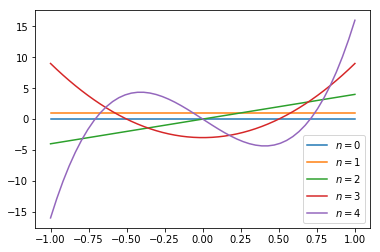

In [139]:
p1_6_2()

## Problem 7. {-}

In [165]:
def p1_7_1(N=200):
    
    tol=1e-3
    
    f = lambda x:(anp.sin(x)+1)**(anp.sin(anp.cos(x)))
    
    cent=np.zeros(N)
    ag=np.zeros(N)
    t=np.zeros(N)
    t_ag=np.zeros(N)
    t_cent=np.zeros(N)
    
    for i in range(N):
        
        x_0 = np.random.rand()
        
        t_0 = time.time()
        exact_value = p1_1_1(x_0)
        t[i] =  time.time()-t_0
        
        t_cent_0 = time.time()
        cent[i] = np.abs(p1_2_6(f,x_0,tol)-exact_value)
        t_cent[i] = time.time()-t_cent_0
        
        
        t_ag_0 = time.time()
        ag[i] = np.abs(grad(f)(x_0)-exact_value)
        t_ag[i] = time.time()-t_ag_0
            
    plt.figure()
    
    plt.scatter(t,1e-18*np.ones(N),alpha=.3,label="SymPy",s=35)
    plt.scatter(t_cent,cent,alpha=.3,label="Difference Quotients",s=35)
    plt.scatter(t_ag,ag,alpha=.3,label="Autograd",s=35)
    
    plt.xlim(3e-5, 1e-1)
    plt.ylim(1e-19, 1e-11)
    plt.loglog()
    
    plt.xlabel("Computation Time (seconds)")
    plt.ylabel("Absolute Error")
    
    plt.legend()
    plt.show()
    
    

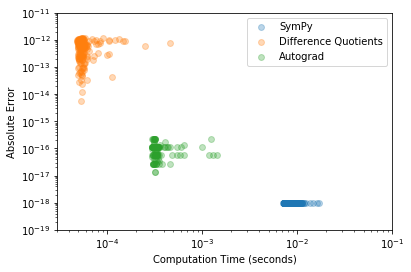

In [166]:
p1_7_1()

# Numerical Integration

## Exercise 1. {-}

In [176]:
def p2_1_1(fun, a, b, N, meth):

    i=np.arange(0,N,1)
    
    x = a+((2*i+1)*(b-a))/(2*N)

    if meth=="midpoint":
        return ((b-a)/N)*np.sum(fun(x))

    elif meth=="trapezoid":
        return (b-a)/(2*N)*(fun(x[0])+2*np.sum(fun(x[1:-1]))+fun(x[-1]))

    elif meth=="simpson":
        i=np.arange(0,2*N,1)
        x=a+(i*(b-a))/(2*N)
        
        return (((b-a)/(6*(N+1)))*(fun(x[0])+4*np.sum(fun(x[1:(2*N-1):2]))+
                                   2*np.sum(fun(x[2:(2*N-2):2]))+fun(x[-1])))
    
    else:
        print("Please specify the method.")
        return None


In [183]:
def p2_1_2():
    
    fun_1 = lambda x: 0.1*x**4-1.5*x**3+0.53*x**2+2*x+1
    
    print("Midpoint:\t",round(p2_1_1(fun_1,-10,10,500,"midpoint"),3))
    print("trapezoid:\t",round(p2_1_1(fun_1,-10,10,1000,"trapezoid"),3))
    print("Simpson:\t",round(p2_1_1(fun_1,-10,10,500,"simpson"),3))

In [184]:
p2_1_2()

Midpoint:	 4373.279
trapezoid:	 4352.322
Simpson:	 4381.575


## Exercise 2. {-}

In [192]:
def p2_2_1(μ,σ,N,k):
        
    ω = np.zeros(N)
    Z = np.linspace(μ-k*σ,μ+k*σ,N)
    
    ω[0] = norm(loc=μ,scale=σ).cdf((Z[0]+Z[1])/2)
    
    for i in range(1,N-1):
        
        Z_min = (Z[i-1]+Z[i])/2
        Z_max = (Z[i]+Z[i+1])/2
        
        ω[i] = norm(loc=μ,scale=σ).cdf(Z_max)-norm(loc=μ,scale=σ).cdf(Z_min)
    
    ω[-1] = 1-norm(loc=μ,scale=σ).cdf(Z[-2]+Z[-1])
    
    return Z,ω

In [195]:
def p2_2_2():
    print("NODES:\n",p2_2_1(0,1,11,3)[0],"\nWEIGHTS:\n",p2_2_1(0,1,11,3)[1])

In [196]:
p2_2_2()

NODES:
 [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ] 
WEIGHTS:
 [3.46697380e-03 1.43974468e-02 4.89427807e-02 1.17252924e-01
 1.98028452e-01 2.35822844e-01 1.98028452e-01 1.17252924e-01
 4.89427807e-02 1.43974468e-02 3.33204485e-08]


## Exercise 3. {-}

In [199]:
def p2_3_1(μ,σ,N,k):
    Z,ω = p2_2_1(μ,σ,N,k)
    return np.exp(Z),ω

In [200]:
def p2_3_2():
    print("NODES:\n",p2_3_1(0,1,11,3)[0],"\nWEIGHTS:\n",p2_3_1(0,1,11,3)[1])

In [201]:
p2_3_2()

NODES:
 [ 0.04978707  0.09071795  0.16529889  0.30119421  0.54881164  1.
  1.8221188   3.32011692  6.04964746 11.02317638 20.08553692] 
WEIGHTS:
 [3.46697380e-03 1.43974468e-02 4.89427807e-02 1.17252924e-01
 1.98028452e-01 2.35822844e-01 1.98028452e-01 1.17252924e-01
 4.89427807e-02 1.43974468e-02 3.33204485e-08]


## Exercise 4. {-}

In [203]:
def p2_4():
    μ,σ = 10.5,.8
    print(np.sum(p2_3_1(μ,σ,11,3)[0]*p2_3_1(μ,σ,11,3)[1]))
    print(np.exp(μ+σ**2/2))

In [204]:
p2_4()

48964.58431238742
50011.087008521754


## Exercise 5. {-}

In [217]:
def p2_5_1(params,a,b):
    
    ω,x = params[:3],params[3:]
    
    l=np.empty(len(params))
    
    for i in range(len(params)):
        l[i] = ((b**(i+1)-a**(i+1))/(i+1))-ω @ x**i
        
    return l

In [218]:
def p2_5_2():
    return lambda x: 0.1*x**4-1.5*x**3+0.53*x**2+2*x+1

In [223]:
def p2_5_3():
    
    f=p2_5_2()
    
    params = root(p2_5_1,x0=np.ones(6),args=(-10,10)).x
    
    print("WEIGHTS:\n",params[:3],"\nNODES:\n",params[3:])
    
    print("SUM:\n",np.sum(params[:3]*f(params[3:])))

In [224]:
p2_5_3()

WEIGHTS:
 [5.55555556 5.55555556 8.88888889] 
NODES:
 [-7.74596669e+00  7.74596669e+00  3.25993131e-11]
SUM:
 4373.333333340381


In [225]:
def p2_5_4():
    
    f=p2_5_2()
    
    params=root(p2_5_1,x0=np.ones(6),args=(-10,10)).x
    
    print("WEIGHTS:\n",params[:3],"\nNODES:\n",params[3:])
    
    print("SUM:\n",np.sum(params[:3]*f(params[3:])))

In [226]:
p2_5_4()

WEIGHTS:
 [5.55555556 5.55555556 8.88888889] 
NODES:
 [-7.74596669e+00  7.74596669e+00  3.25993131e-11]
SUM:
 4373.333333340381


## Exercise 6. {-}

In [228]:
def p2_6():
    f=p2_5_2()
    print(quad(f,-10,10))

In [229]:
p2_6()

(4373.333333333334, 8.109531705284936e-11)


## Exercise 7. {-}

In [230]:
def p2_7_1(g,bot,top,N):
    mc = np.random.uniform(bot,top,size=(N,2))
    return 4*(1/N)*np.sum(g(mc[:,0],mc[:,1]))

In [231]:
def p2_7_2(x,y):
    return x**2+y**2<=1

In [244]:
def p2_7_3():
    
    tol=1e-5
    norm=1e3
    n=10
    N=10000
    π4=3.1415
    
    while (norm>tol) and (n<N):
        π = p2_7_1(p2_7_2,-1,1,n)
        diff = np.abs(π-π4)
        n+=1
    
    print("n,π:",n,π)

In [245]:
p2_7_3()

n,π: 10000 3.1267126712671267


## Exercise 8. {-}

In [268]:
def p2_8_1(N):
    
    p = []
    n = 2
    temp = []
    
    while len(p) < N:
        
        for i in p:
            if n%i ==0:
                temp.append(n)
            
        if temp:
            p+=[]
        else:
            p+=[n]
            
        n+=1
        
    return p


In [269]:
def p2_8_2(N, d):
    
    """
    Weyl
    """
    
    p = p2_8_1(d)
    n = np.arange(1,N+1,1)
    o = np.outer(n,np.sqrt(p))
    
    return o-np.floor(o)

In [270]:
def p2_8_3(N, d):
    
    """
    Haber
    """
    
    p = p2_8_1(d)
    n = np.arange(1,N+1,1)
    o = np.outer((n*(n+1))/2,np.sqrt(p))
    
    return o-np.floor(o)


In [271]:
def p2_8_4(N, d):
    
    """
    Niederreiter
    """
    
    s = np.arange(1,d+1,1)
    n = np.arange(1,N+1,1)
    p = np.outer((1/(n+1)),s)
    o = n.reshape(N,1)*2**p
    
    return o-np.floor(o)

## Exercise 9. {-}

In [272]:
def p2_9_1(g,min_x,max_x,N):
    mc = 2*p2_8_3(N,2)-1
    return 4*(1/N)*np.sum(g(mc[:,0],mc[:,1]))

In [273]:
def p2_9_2():
    return p2_9_1(p2_7_2,-1,1,10000)

In [274]:
p2_9_2()

3.1460000000000004

# Simplex Method

In [292]:
class Simplex:
    """
    Thank you, Natasha, for help on organizing this script.
    """
    
    def __init__(self,c,A,b):
        
        self.c,self.A,self.b = np.array(c),np.array(A),np.array(b)
        
        if np.any(self.b<0): raise ValueError("Not feasible!")
        
        self.m,self.n = self.A.shape
        
        t = self.m+self.n
        self.L = np.concatenate([np.arange(self.n,t,1),np.arange(0,self.n,1)])
        
        self.T = self.tableau()
        
    def tableau(self):
        
        I_m = np.eye(self.m)
        
        A_bar = np.hstack([self.A,I_m])
        
        c_bar = np.hstack([self.c,np.zeros(self.m)])
        
        return np.vstack([np.hstack([0,-1*c_bar.T,1]),
                          np.column_stack([self.b,A_bar,np.zeros(self.m)])])
    
    def check(self):
        
        T = self.T.copy()
        c = int(np.argwhere(T[0,1:]<0)[0])+1
                
        if np.all(T[:,c]<=0): raise ValueError("Unbounded!")
            
        T_n=T[:,c]<=0
        
        T[T_n,c] = np.nan
        r = np.nanargmin(T[:,0]/T[:,c])
                
        return r, c 
    
    def pivot(self):
                
        L,T,m = self.L,self.T,self.m
        r,c = self.check()
        
        temp = L.copy()
        
        L[r-1] = temp[c+m-1]
        L[c+m-1] = temp[r-1]
                        
        T[r,:]/=T[r, c]
        
        for i in range(T.shape[0]):
            if i!=r:
                k = -1*T[i,c]
                T[i,:] += k*T[r,:]
        
        self.T = T
        self.L = L
        
    def solve(self):
        
        while np.any(self.T[0,:]<0): self.pivot()

        return (self.T[0, 0], 
                dict(zip(self.L[self.m:], np.zeros(self.m))), 
                dict(zip(self.L[:self.m], self.T[1:, 0])))

In [293]:
def p3_7():
    
    c =  [3,2]
    A = [[1,-1], 
         [3,1],
         [4,3]]
    b =  [2,  ,7]

    problem = Simplex(c,A,b)
    
    print("c:\n",c,"\nA:\n",A,"\nb:\n",b)
    print("\n--> SOLUTION:")
    print(problem.solve())

    dat = np.load("productMix.npz")

    a,p,m,d = dat["A"],dat["p"],dat["m"],dat["d"]
    A = np.row_stack([a, np.eye((4))])
    b = np.concatenate([m, d])

    print("\n\n--> SOLUTION for productMix data:")
    print(Simplex(p,A,b).solve())

In [294]:
p3_7()

c:
 [3, 2] 
A:
 [[1, -1], [3, 1], [4, 3]] 
b:
 [2, 5, 7]

--> SOLUTION:
(5.2, {3: 0.0, 4: 0.0}, {2: 0.5999999999999996, 0: 1.6, 1: 0.19999999999999982})


--> SOLUTION for productMix data:
(7453.596491228071, {7: 0.0, 4: 0.0, 9: 0.0, 5: 0.0}, {1: 6.192982456140348, 3: 1.7894736842105292, 6: 0.9659649122807016, 0: 10.0, 8: 13.807017543859653, 2: 12.0, 10: 8.21052631578947})


# Iterative Solvers

_Thanks Natasha for your reference on this section. Unfortunately, I struggled with the debugging process since I was short on time._

In [63]:
TOL=1e-10
MAXITERS=1000

## Exercise 1. {-}

In [46]:
def jacobi(A,b,tol=TOL,maxiters=MAXITERS,plot=False):
    ε=1000
    k=0
    D=np.diag(A)
    
    x = np.ones_like(b)
    
    ε_vec = np.empty(maxiters)
    
    while (k<maxiters) and (ε>tol):
        x_pr = x+ ((b-A@x)/D)
        ε_vec[k] = norm(x_pr-x,1e15)
        ε=ε_vec[k]
        k+=1
        x= x_pr
        
    if (k<maxiters): print("Converged! k =",k)
        
    if plot:
        plt.plot(range(1,k+1),ε_vec[:k])
        plt.semilogy()
        plt.xlim(1,k)
        plt.title("Jacobi Convergence")
        plt.xlabel("$k$")
        plt.ylabel("Abs Approx Err")
        plt.show()
        
    return x

In [47]:
def diag_dom(n,num_entries=None):
    
    if num_entries == None:
        num_entries = int(n**1.5)-n
        
    A = np.zeros((n,n))
    rows = np.random.choice(np.arange(0,n),size=num_entries)
    cols = np.random.choice(np.arange(0,n),size=num_entries)
    data = np.random.randint(-4,4,size=num_entries)
    
    for i in range(num_entries): 
        A[rows[i],cols[i]]=data[i]
    for i in range(n): 
        A[i,i] = np.sum(np.abs(A[i]))+1
    
    return A

In [48]:
def test():
    n=np.random.randint(1,10_000)
    A=diag_dom(n)
    b=np.random.random(n)
    print(A,b)
    
    x_s = jacobi(A,b,plot=True)
    print(x_s)

In [49]:
test()

[[31.  0.  0. ...  0.  0.  0.]
 [ 0. 40.  0. ...  0.  0.  0.]
 [ 0.  0. 36. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... 33.  0.  0.]
 [ 0.  0.  0. ...  0. 50.  0.]
 [ 0.  0.  0. ...  0.  0. 32.]] [8.88874664e-01 7.39456783e-01 6.77980574e-01 6.20659454e-02
 1.66531926e-01 5.33772185e-02 6.78488221e-02 3.77235608e-02
 1.76933215e-01 3.90681831e-01 2.85688563e-01 1.18175129e-01
 9.85949045e-01 5.24647900e-01 2.48142724e-01 8.87284452e-01
 3.55752684e-01 7.35809950e-02 4.96004748e-01 8.49228275e-01
 8.49906283e-01 6.78340969e-01 2.48515596e-01 7.04579406e-01
 9.62498129e-01 3.41405066e-01 6.63256136e-01 6.63825139e-01
 7.79826130e-01 2.98564494e-01 2.66757344e-03 9.34370876e-01
 2.03141691e-01 1.97255462e-01 2.88363988e-01 3.00126061e-01
 2.06615323e-01 6.76297317e-01 7.03886423e-01 3.24041536e-01
 9.82440847e-01 9.58364808e-01 1.91999451e-01 1.64331494e-01
 7.93990571e-01 7.72364812e-01 3.81287625e-01 2.65144344e-01
 7.53959040e-01 5.54476817e-01 7.46081748e-01 8.24512717e-01
 5.53111891e-01

TypeError: float() argument must be a string or a number, not 'rv_frozen'

I couldn't fix this bug. :(

## Exercise 2. {-}

See above.

## Exercise 3. {-}

In [58]:
def gauss_seidel(A,b,tol=TOL,maxiters=MAXITERS,plot=False):
    
    ε=1e3
    k=0
    
    x=np.ones_like(b)
    
    x_pr = x.copy()
    
    ε_vec=np.empty(maxiters)
    
    while (k<maxiters) and (ε<tol):
        
        for i in range(len(x)):
            x_pr[i] = x_pr[i] + (1/A[i,i]) * (b[i]-A[i,:].T@x_pr)
            
        ε_vec[k] = norm(x_pr-x,1e15)
        
        ε=ε_vec[k]
        
        k+=1
        
        x=x_pr.copy()
        
    if k<maxiters: print("Converged at k =",k)
    
    if plot:
        
        plt.plot(range(1,k+1),ε_vec[k])
        plt.semilogy()
        plt.xlim(1,k)
        plt.title("Guass-Seidel Convergence")
        plt.xlabel("Iteration")
        plt.ylabel("Abs Approx Err")
        
        plt.show()
        
    return x
        
        

In [59]:
def test2():
    n=np.random.randint(1,10_000)
    A=diag_dom(n)
    b=np.random.random(n)
    print(A,b)
    
    x_s = gauss_seidel(A,b,plot=True)
    print(x_s)

[[178.   0.   0. ...   0.   0.   0.]
 [ -3. 184.   0. ...   0.   0.   0.]
 [  0.   0. 141. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 185.   0.   0.]
 [  0.   0.   0. ...   0. 141.   0.]
 [  0.   0.   0. ...  -4.   0. 160.]] [0.14056951 0.71223297 0.91450283 ... 0.39490839 0.59137012 0.05732009]
Converged at k = 0


ValueError: x and y must have same first dimension, but have shapes (0,) and (1,)

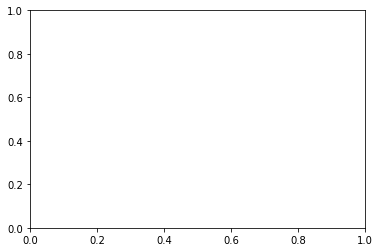

In [60]:
test2()

Couldn't fix this one either :(

## Exercise 4. {-}

In [64]:
def sparse_gauss_seidel(A,b,tol=TOL,maxiters=MAXITERS):
    
    ε=1000
    k=0
    
    x=np.ones_like(b)
    
    x_pr = x.copy()
    ε_vec = np.empty(maxiters)
    
    while (k<maxiters) and (ε>tol):
        for i in range(len(x)):
            beg_row=A.indptr[i]
            end_row = A.indptr[i+1]
            
            A_ind = A.data[beg_row:end_row] @ x[A.ind[beg_row:end_row]]
            x_pr[i] = x_pr[i]+(1/A[i,i])*(b[i]-A_ind)
            
        ε_vec[k] = norm(x_pr-x,1e15)
        ε = ε_vec[k]
        
        k+=1
        x = x_pr.copy()
        
    if (k<maxiters): print("Converged at k =",k)
    else: print("No Convergence!")
    
    return x

## Exercise 5. {-}

In [96]:
def sor(A,b,ω,tol=TOL,maxiters=MAXITERS,plot=False,out=True):
    
    ε=1000
    k=0
    
    x = np.ones_like(b)
    
    x_pr = x.copy()
    
    ε_vec = np.empty(maxiters)
    
    while (k<maxiters) and (ε>tol):
        for i in range(len(x)):
            x_pr[i] = x_pr[i]+(ω/A[i,i])*(b[i]-A[i,:].T@x_pr)  
        
        ε_vec[k] = norm(x_pr-x,1e15)
        
        ε=ε_vec[k]
        
        k+=1
        
        x = x_new.copy()
        
    if out:
        if (k<maxiters): print("Converged at k =",k)
        else: print("No Convergence!")
        
    return x,k,(k<maxiters)

In [97]:

def test3():
    n=np.random.randint(1,10_000)
    
    A=diag_dom(n)
    b=np.random.random(n)
    print(A,b)
    
    print(sor(A,b,1.5))

In [98]:
test3()

[[181.   0.   0. ...   0.   0.   0.]
 [  0. 203.   0. ...   0.   0.   0.]
 [  0.   0. 162. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 154.   0.   0.]
 [  0.   0.   0. ...   0. 131.   0.]
 [  0.   0.   0. ...   0.   0. 182.]] [0.79491071 0.9724238  0.03890028 ... 0.29625166 0.58374908 0.95701192]


TypeError: float() argument must be a string or a number, not 'rv_frozen'

Same issue :(

## Exercise 6. {-}

In [99]:
def laplace_sor(n,ω,tol=TOL,maxiters=MAXITERS,plot=False,out=True):
    
    A = -4*np.eye(n**2)+np.eye(n**2,k=1)+np.eye(n**2,k=-1)+np.eye(n**2,k=-n)+np.eye(n**2,k=n)
    b = np.zeros(n)
    
    b[0] = -100
    b[-1] = -100
    
    b = np.tile(b,n)
    
    u_vec,ks,conv_bool = sor(A,b,ω,tol=tol,maxiters=maxiters,plot=plot,out=out)
    u_vec = u_vec.reshape(n,n)

    if plot:
        plt.pcolormesh(u,cmap="viridis")
        plt.show()
        
    return u,ks,conv_bool

In [100]:
def test4():
    laplace_sor(50,2,plot=True)

In [101]:
test4()

TypeError: float() argument must be a string or a number, not 'rv_frozen'

_Same error again!_

## Exercise 7. {-}

In [102]:
def p7():
    
    ω_2 = np.linspace(1,1.95,20)
    ks = np.nan*np.ones_like(ω_2)
    n=20

    for i in range(len(ω_2)):
        s = laplace_sor(n,ω_2[i],tol=1e-2,maxiters=1000,out=False)
        if s[2]: ks[i]=s[1]
            
    plt.plot(ω_2,ks)
    plt.xlabel("$\omega$")
    plt.ylabel("$k$")
    plt.title("relaxation")
    
    plt.show()

In [103]:
p7()

TypeError: float() argument must be a string or a number, not 'rv_frozen'

_Same error again..._

_Did not have enough time to finish the rest of the assignment._